In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import IPython.display as display
import os

from classes import *
from gen_utils import *
from tqdm import tqdm
from utils import *

# fix the seed for reproducibility
random.seed(666)
np.random.seed(666)


# minihack env creation with a .des file

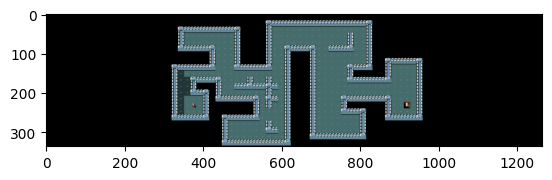

In [38]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "maps/complex_maze.des",
    max_episode_steps=10000,
)
state = env.reset()
#env.render()
plt.imshow(state['pixel'])

In [39]:
state = env.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

map = Map(game_map, start, target)

In [40]:
print(f"> start: {map.start}, target: {map.target}")

> start: (14, 23), target: (14, 57)


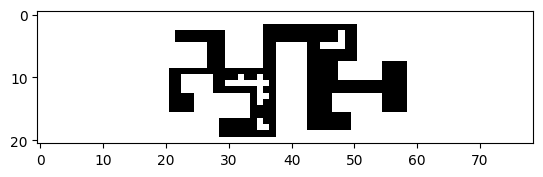

In [41]:
# print the map_matrix with matplotlib where the walls are black and the floor is white
plt.imshow(map.map_matrix, cmap='gray')
plt.show()


In [42]:
# show the size of the map
print(f"> map size: {map.game_map.shape}")

> map size: (21, 79)


In [43]:
from pyswip import Prolog


In [44]:
PATH = 'kb/kb.pl'
KB = Prolog()
KB.consult(PATH)

In [45]:
KB.retractall("maze(_)")
KB.retractall("start(_,_)")
KB.asserta(f'maze({map.map_matrix})')
KB.asserta(f'start({map.start[0]}, {map.start[1]})')

In [46]:
for i in KB.query("maze(X)"):
    print(f'{i["X"]}\n')

#list(KB.query("maze(X)"))


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# NTH1

In Prolog, `nth1/3` is a built-in predicate that is used to access elements in a list by index. The `nth1/3` predicate has the following form:

```prolog
nth1(Index, List, Element)
```
Index: The index of the element you want to access.

List: The list from which you want to access the element.

Element: The variable that will be unified with the element at the specified index.


In [47]:
result = list(KB.query("maze(M), nth1(14, M, Row), nth1(23, Row, Cell)"))
if result:
    cell_value = result[0]["Cell"]
    print(f"Cell value: {cell_value}")
else:
    print("Query result is empty.")

Cell value: 0


In [48]:
list(KB.query("start(ROW,COL)"))

[{'ROW': 14, 'COL': 23}]

In [49]:
list(KB.query(f"is_valid(10,23)"))

[{}]

In [50]:
list(KB.query(f"is_valid(9,23)"))

[]

In [51]:
solution = list(KB.query(f"is_valid(14,23)"))
if solution:
    print("Position is valid.")
else:
    print("Position is not valid.")

Position is valid.


In [52]:
list(KB.query(f"is_valid_action(11,23,0)"))

[{}]

In [53]:
list(KB.query(f"is_valid_action(10,23,0)"))

[]

In [54]:
#individual = Individual(random_nactions(), 1, map)

In [55]:
#individual.path[0] == map.start

# We have to decide if we want to generate a random path or random actions

random path $\Rightarrow$ a path of exactly n steps

random actions $\Rightarrow$ many action will be not valid $\Rightarrow$ the path will be shorter OR, as is implemented now, with many repetition of the same position.

# NOTE:
minihack wont crash if we input a not valid action starting from a valid action. It will simply not execute the action (as if we are playing), hence we are updating the path position with the same position.

In [56]:
map.start

(14, 23)

In [57]:
Individual(random_nactions(300), 1, map)

Path: [(14, 24), (14, 23), (14, 24), (15, 24), (15, 23), (15, 23), (15, 23), (14, 23), (14, 22), (14, 23), (15, 23), (15, 22), (15, 21), (14, 21), (14, 21), (13, 21), (14, 21), (13, 21), (13, 21), (14, 21), (14, 22), (15, 22), (15, 22), (14, 22), (14, 21), (14, 22), (15, 22), (14, 22), (14, 21), (15, 21), (14, 21), (15, 21), (15, 21), (14, 21), (13, 21), (13, 21), (13, 22), (13, 23), (13, 23), (13, 23), (13, 24), (14, 24), (14, 23), (14, 22), (14, 21), (14, 21), (14, 21), (15, 21), (15, 22), (15, 21), (15, 21), (14, 21), (14, 21), (15, 21), (15, 21), (15, 22), (15, 21), (15, 22), (15, 23), (15, 23), (15, 24), (15, 24), (15, 23), (15, 24), (15, 24), (15, 24), (14, 24), (15, 24), (15, 24), (15, 24), (15, 23), (15, 24), (15, 24), (14, 24), (14, 24), (15, 24), (15, 23), (15, 23), (15, 23), (15, 22), (15, 21), (15, 21), (15, 21), (15, 22), (15, 21), (14, 21), (14, 22), (14, 23), (14, 24), (14, 24), (14, 24), (13, 24), (13, 24), (13, 24), (13, 24), (13, 24), (13, 24), (13, 24), (13, 24), (13

In [58]:
individual = Individual(random_nactions(300), 1, map)
individual1 = Individual(random_nactions(300), 1, map)
len(crossover_uniform(individual.actions, individual1.actions))

300

In [59]:
# no need to call raw count_loops function anymore
individual.path.loops, individual1.path.loops

(274, 271)

In [60]:
(individual.path)

In [61]:
individual.target_index

-1

In [62]:
# create first generation
MAX_GENERATIONS = 500
MAX_INDIVIDUALS = 100
best_individuals = []

print("> Creating initial population...")
individuals = [Individual(random_nactions(300), 1, map) for _ in range(MAX_INDIVIDUALS)]
individuals.sort(key=lambda x: x.fitness, reverse=True)
#print(f'best_individual: {individuals[0].fitness}')
print("> Evolving...")

for generation in tqdm(range(MAX_GENERATIONS)):

    best_fitness = individuals[0].fitness
    best_individuals.append(individuals[0]) 
    if generation % 25 == 0:
        print(
            f'best_individual in generation {generation}: fitness: {best_fitness}, wrong actions: {individuals[0].wrong_actions}, loops: {individuals[0].path.loops}, distance: {individuals[0].distance}')

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.
    child1, child2 = individuals[0].actions, individuals[1].actions
    offspring = [crossover_uniform(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child, valid_actions_bitmap(map.start, path_from_actions(map.game_map, map.start, child))) for child in offspring]

    individuals[2:] = [Individual(offspring[i], generation+1, map) for i in range(MAX_INDIVIDUALS-2)]
    individuals.sort(key=lambda x: x.fitness, reverse=True)

best_fitness = individuals[0].fitness
best_individuals.append(individuals[0])
print(f'best_individual in generation {generation}: {best_fitness}, wrong actions: {individuals[0].wrong_actions}')



> Creating initial population...


> Evolving...


  0%|          | 0/500 [00:00<?, ?it/s]

best_individual in generation 0: fitness: -751, wrong actions: 85, loops: 230, distance: 27


  5%|▌         | 25/500 [00:25<08:05,  1.02s/it]

best_individual in generation 25: fitness: -437, wrong actions: 23, loops: 177, distance: 0


 10%|█         | 50/500 [01:03<16:09,  2.15s/it]

best_individual in generation 50: fitness: -437, wrong actions: 23, loops: 177, distance: 0


 15%|█▌        | 75/500 [02:01<17:08,  2.42s/it]

best_individual in generation 75: fitness: -437, wrong actions: 23, loops: 177, distance: 0


 20%|██        | 100/500 [02:54<13:03,  1.96s/it]

best_individual in generation 100: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 25%|██▌       | 125/500 [03:34<11:28,  1.84s/it]

best_individual in generation 125: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 30%|███       | 150/500 [04:28<12:28,  2.14s/it]

best_individual in generation 150: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 35%|███▌      | 175/500 [05:10<06:45,  1.25s/it]

best_individual in generation 175: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 40%|████      | 200/500 [05:36<05:09,  1.03s/it]

best_individual in generation 200: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 45%|████▌     | 225/500 [06:01<04:28,  1.02it/s]

best_individual in generation 225: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 50%|█████     | 250/500 [06:26<03:58,  1.05it/s]

best_individual in generation 250: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 55%|█████▌    | 275/500 [06:52<04:12,  1.12s/it]

best_individual in generation 275: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 60%|██████    | 300/500 [07:17<03:24,  1.02s/it]

best_individual in generation 300: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 65%|██████▌   | 325/500 [07:43<03:10,  1.09s/it]

best_individual in generation 325: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 70%|███████   | 350/500 [08:10<02:28,  1.01it/s]

best_individual in generation 350: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 73%|███████▎  | 367/500 [08:26<03:03,  1.38s/it]


KeyboardInterrupt: 

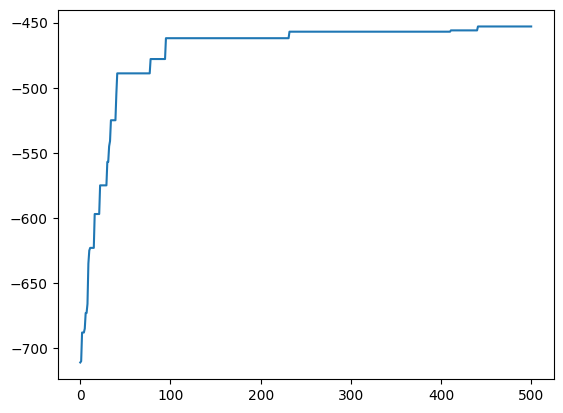

In [ ]:
# Plot for each generation the best fitness
best_fitness = [best_individuals[i].fitness for i in range(len(best_individuals))]
plt.plot(best_fitness)

In [ ]:
individuals[3].generation

500

YOU WON! <3


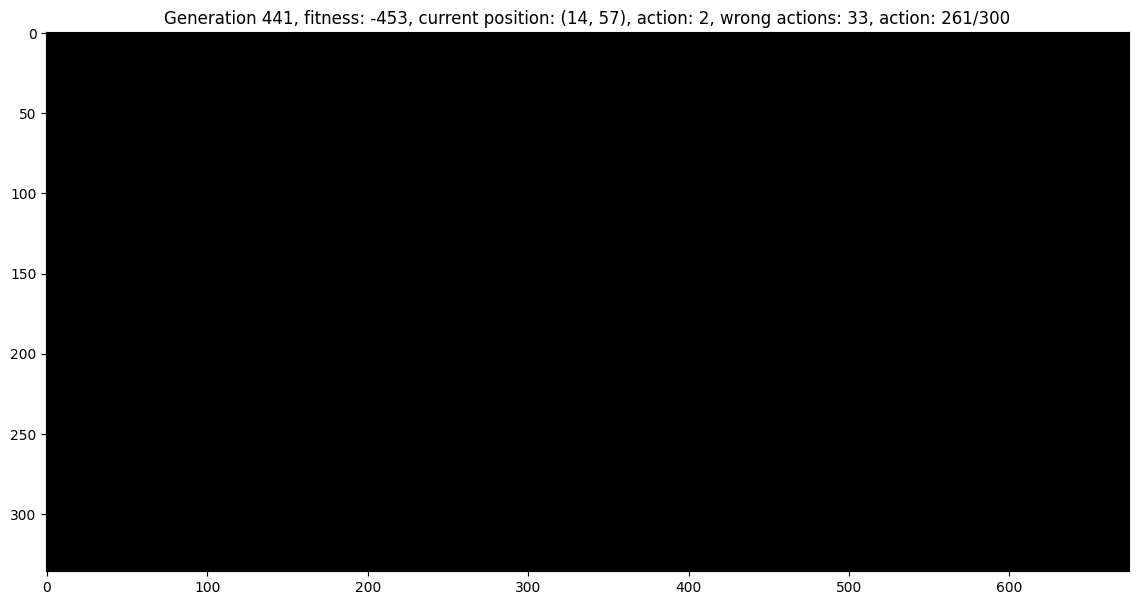

In [ ]:
env.reset()
plt.rcParams['figure.figsize'] = [17, 7]

image = plt.imshow(game[:, 300:975])
# for generation, path in enumerate(best_paths):
# plt.title(f"Generation {generation}, fitness: {best_scores[generation]:.2f}, last move: {path[-1]}")
#start = best_paths[0]
#path = best_paths[-1]
actions = []
actions = individuals[0].actions
wrong = 0

for i, action in enumerate(actions):
    try: 
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.title(f"Generation {individuals[0].generation}, fitness: {individuals[0].fitness}, current position: {individuals[0].path[i]}, action: {action}, wrong actions: {wrong}, action: {i+1}/{len(actions)}")
        image.set_data(s['pixel'][:, 300:975])
        #time.sleep(0.1)
        if individuals[0].path[i] == map.target:
            print('YOU WON! <3')
            break
        if individuals[0].path[i] == individuals[0].path[i-1]:
            wrong += 1
    except RuntimeError:
        print('YOU WON! <3')

In [ ]:
target

In [ ]:
"""MAX_GENERATIONS = 1000
MAX_INDIVIDUALS = 100

best_scores =[]
best_paths = []
zero_fitness = []

# create a list of individuals, starting with random moves (illegal actions filtered out)
print("> Creating initial population...")
individuals = [random_nsteps(game_map, start, target) for _ in range(MAX_INDIVIDUALS)]
best_fitness = np.inf

print("> Evolving...")
for generation in tqdm(range(MAX_GENERATIONS)):
    
    generation_scores = []

    #fitnesses = [fitness_function(individual, checkpoints, generation) for individual in individuals]
    #fitness_function = lambda path: abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1])

    ind_actions = [actions_from_path(start, ind) for ind in individuals]
    generation_scores.append(min(fitnesses))

    # this is a list of tuples (individual, fitness). individual is a list of moves
    population = list(zip(individuals, fitnesses))
    actions =  list(zip(ind_actions, fitnesses))

    # sorting the population by best fitness (lower is better)
    population.sort(key=lambda x: x[1])
    actions.sort(key=lambda x:x[1])
    # sort ind_actions with respect to population
    
    #print(f"best score: {population[0][1]:.2f}")

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.

    child1, child2, = actions[0][0], actions[1][0]

    offspring = [crossover(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child) for child in offspring]
    ind_actions = offspring
    individuals = [path_from_actions(game_map, start, child) for child in offspring]

    best_fitness = population[0][1]
    best_scores.append(population[0][1])    
    best_paths.append(population[0][0])
    #print(f"Generation {generation}: best score {best_fitness:.2f}")

    if best_fitness == 0:
        zero_fitness.append(population[0][0])
    
# print best score and best path
best_idx = np.argmin(best_scores)
print(f"Best score: {best_scores[best_idx]:.2f}")
print(f"Best path: {best_paths[best_idx]}")
print(f"generation of best path: {best_idx}")"""

In [ ]:
# Vediamo che succede se due azioni sono uguali
actions_test = random_nactions(300)

In [ ]:
path_test = path_from_actions(map.game_map, map.start, actions_test)
path2 = Path(path_test, map)
path2.path

[(14, 24),
 (14, 23),
 (14, 24),
 (15, 24),
 (15, 23),
 (15, 23),
 (15, 23),
 (14, 23),
 (14, 22),
 (14, 23),
 (15, 23),
 (15, 22),
 (15, 21),
 (14, 21),
 (14, 21),
 (13, 21),
 (14, 21),
 (13, 21),
 (13, 21),
 (14, 21),
 (14, 22),
 (15, 22),
 (15, 22),
 (14, 22),
 (14, 21),
 (14, 22),
 (15, 22),
 (14, 22),
 (14, 21),
 (15, 21),
 (14, 21),
 (15, 21),
 (15, 21),
 (14, 21),
 (13, 21),
 (13, 21),
 (13, 22),
 (13, 23),
 (13, 23),
 (13, 23),
 (13, 24),
 (14, 24),
 (14, 23),
 (14, 22),
 (14, 21),
 (14, 21),
 (14, 21),
 (15, 21),
 (15, 22),
 (15, 21),
 (15, 21),
 (14, 21),
 (14, 21),
 (15, 21),
 (15, 21),
 (15, 22),
 (15, 21),
 (15, 22),
 (15, 23),
 (15, 23),
 (15, 24),
 (15, 24),
 (15, 23),
 (15, 24),
 (15, 24),
 (15, 24),
 (14, 24),
 (15, 24),
 (15, 24),
 (15, 24),
 (15, 23),
 (15, 24),
 (15, 24),
 (14, 24),
 (14, 24),
 (15, 24),
 (15, 23),
 (15, 23),
 (15, 23),
 (15, 22),
 (15, 21),
 (15, 21),
 (15, 21),
 (15, 22),
 (15, 21),
 (14, 21),
 (14, 22),
 (14, 23),
 (14, 24),
 (14, 24),
 (14, 24),

In [ ]:
actions_test2 = actions_from_path(map.start, path2.path)

In [ ]:
print(actions_test2)

[1, 3, 1, 2, 3, 1, 1, 0, 3, 1, 2, 3, 3, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 1, 1, 2, 1, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 2, 1, 1, 3, 1, 1, 0, 1, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 2, 1, 2, 1, 1, 1, 3, 0, 1, 1, 0, 0, 1, 0, 3, 1, 1, 0, 1, 2, 3, 1, 3, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 3, 1, 1, 0, 1, 3, 2, 3, 2, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
count = 0
for i in range(len(actions_test)):
    if actions_test[i] != actions_test2[i]:
        count += 1
print(count)

108
